In [2]:
# Importing Moduls:
from matplotlib import pyplot as plt
import seaborn as sns
from data_parsing_functions import *
from pandasgui import show

path_cleaned_data = f"{DATA_PATH}/{DIR_DATA_CLEANED_for_ANALYSIS}"
path_results = f"{RESULTS_PATH}"

This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.


In [2]:
pd.set_option('display.float_format', lambda x: '%0.2f' % x)
all_key_metrics = pd.read_csv(f"{path_cleaned_data}/{name_key_metrics}")
all_success_rates = pd.read_csv(f"{path_cleaned_data}/{name_all_success_rates}")

key_metrics_without_total_random = all_key_metrics[all_key_metrics[allocation_type] != "Random from set of trainers"]
success_rates_without_total_random = all_success_rates[all_success_rates[allocation_type] != "Random from set of trainers"]
key_metrics_without_total_random.head()

,Coefficient of Variation,Mean,Standard Deviation,Ratio of Assigned CourseSeats,Allocation Type
0,0.38,0.62,0.23,0.90,Random from applications
1,0.54,0.51,0.28,0.90,Random from applications
2,0.45,0.58,0.26,0.90,Random from applications
3,0.32,0.60,0.19,0.90,Random from applications
4,0.40,0.60,0.24,0.90,Random from applications


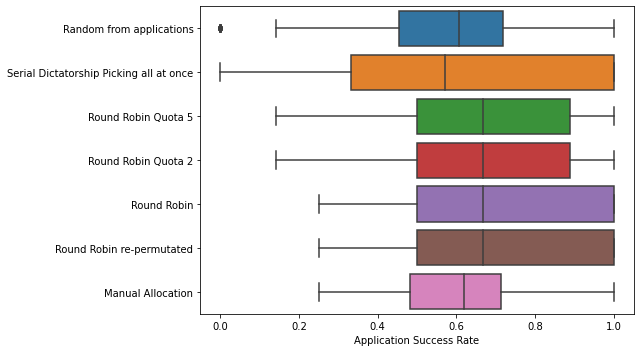

In [3]:
plt.figure(figsize=(9,5))

bar = sns.boxplot(data = all_success_rates, y=allocation_type, x=app_success_rate, orient="h")
bar.set(ylabel = None)
#plt.title("The Distribution of Application Success Rate by different allocation mechanisms")
plt.tight_layout()
#plt.savefig(f"{path_results}/applications_success_rate_per_mechanism.svg")

In [4]:
pd.set_option('display.float_format', lambda x: '%0.2f' % x)
group_allocations = all_key_metrics.groupby(allocation_type).agg({coef_variation: ["min", "mean", "std"], name_ratio_filled_seats:"mean"})
group_allocations

Coefficient of Variation            \
                                                             min mean  std   
Allocation Type                                                              
Manual Allocation                                           0.35 0.35  NaN   
Random from applications                                    0.22 0.36 0.06   
Round Robin                                                 0.28 0.32 0.02   
Round Robin Quota 2                                         0.26 0.32 0.03   
Round Robin Quota 5                                         0.28 0.36 0.03   
Round Robin re-permutated                                   0.29 0.32 0.02   
Serial Dictatorship Picking all at once                     0.36 0.53 0.09   

                                        Ratio of Assigned CourseSeats  
                                                                 mean  
Allocation Type                                                        
Manual Allocation                                                0.81  
Random from applications                                         0.90  
Round Robin                                                      0.90  
Round Robin Quota 2                                              0.90  
Round Robin Quota 5                                              0.90  
Round Robin re-permutated                                        0.90  
Serial Dictatorship Picking all at once                          0.90

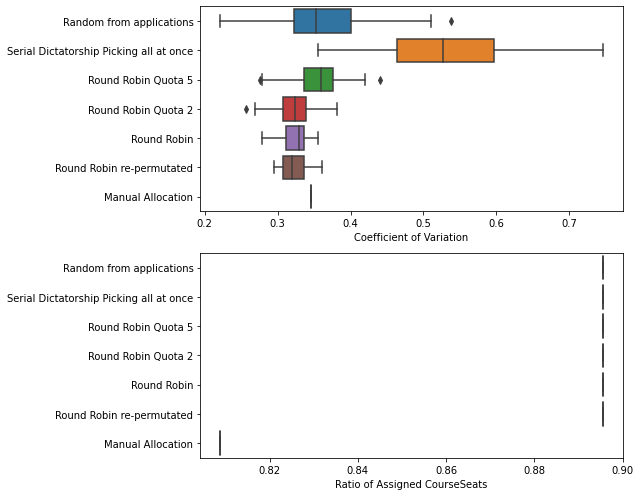

In [5]:
#hist_for_all_variables(sd_alloc_comb[[app_success_rate]], False)
num_plts = 2
num_cols = 1
import math
fig, axs = plt.subplots(math.ceil(num_plts/num_cols), num_cols, figsize=(9,7));
flat_axs = axs.flatten();

for count, i in enumerate([coef_variation,  name_ratio_filled_seats]):
    g = sns.boxplot(data=all_key_metrics,ax=flat_axs[count], x=i, y=allocation_type)
    #g.set_xticklabels(g.get_xticklabels(),rotation=0)
    g.set(ylabel = None)
plt.tight_layout()
#plt.savefig(f"{path_results}/{coef_variation}_and{name_ratio_filled_seats}__per_mechanism.svg")

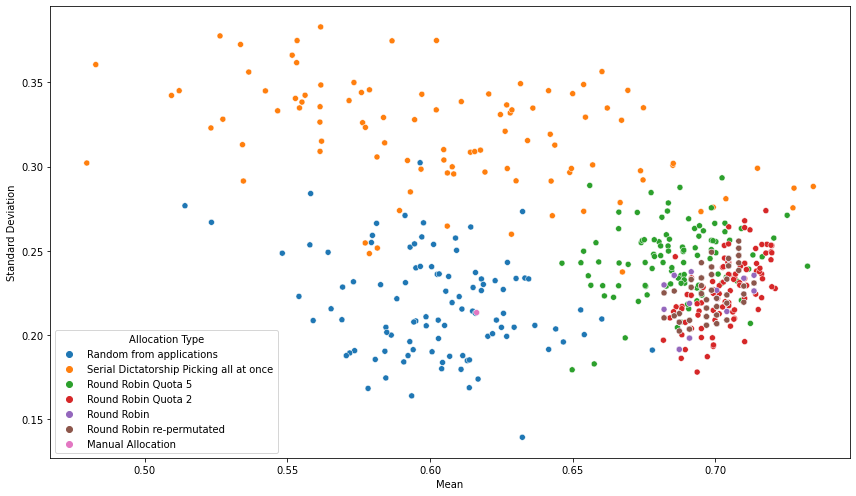

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(12, 7));
sns.scatterplot(data = all_key_metrics ,x=mean, y=stand_dev, hue=allocation_type)
# sns.scatterplot(data = all_key_metrics, ax=axs[1], x="Mean", y="SD", hue="Allocation Type", legend=False)
# sns.scatterplot(data = all_key_metrics, ax=axs[2], x="Median", y="SD", hue="Allocation Type", legend=False)
plt.tight_layout()
#plt.savefig(f"{path_results}/mean_std_for_all_allocations.png")

In [7]:
## Kruskal Walis Test 
from scipy import stats
from scipy.stats import f_oneway
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
def array_of_all_key_metrics (a_metric, a_value):
    ar_of_group = np.array(all_key_metrics[a_metric][all_key_metrics[allocation_type] == a_value])
    return ar_of_group, a_value

for metric in [coef_variation, name_ratio_filled_seats]:
    lst_columns = [allocation_type, f"Kruskal Wallis Test statistics", f"Kruskal Wallis Test p-value", f"1-Way ANOVA Test statistics", f"1-Way ANOVA Test p-value"]
    lst_names = []
    lst_kruskal_wallis_p_value = []
    lst_oneway_p_value = []
    lst_kruskal_wallis_stat = []
    lst_oneway_stat = []
    
    rr_SER, rr = array_of_all_key_metrics(metric, "Round Robin")
    rr_re_per_SER, rr_re_per = array_of_all_key_metrics(metric, "Round Robin re-permutated")
    sd_SER, sd = array_of_all_key_metrics(metric,"Serial Dictatorship Picking all at once")
    rr_quot_2_SER, rr_quot_2 = array_of_all_key_metrics(metric,"Round Robin Quota 2")
    rr_quot_5_SER, rr_quot_5 = array_of_all_key_metrics(metric,"Round Robin Quota 5")
    random_SER, random = array_of_all_key_metrics(metric,"Random from applications")
    tr_SER, tr = array_of_all_key_metrics(metric, "Random from set of trainers")
    ma_SER, ma = array_of_all_key_metrics(metric, "Manual Allocation")

    print("\n", metric)
    try:
        lst_names.append("All Mechanisms")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER, tr_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER, tr_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER, tr_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER, tr_SER)).statistic)
        lst_names.append("Excluding Random from set of trainers")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER, ma_SER, random_SER)).statistic)
        lst_names.append("+ excluding Manual Allocation")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER,random_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER,random_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER,random_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER,random_SER)).statistic)
        lst_names.append("+ excluding Random from applications")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER, sd_SER)).statistic)
        lst_names.append("+ excluding Serial Dictatorship Picking all at once")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER, rr_quot_5_SER)).statistic)
        lst_names.append("+ excluding Round Robin Quota 5")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER, rr_quot_2_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER, rr_quot_2_SER)).statistic)
        lst_names.append("+ excluding Round Robin Quota 2")
        lst_kruskal_wallis_p_value.append((stats.kruskal(rr_re_per_SER, rr_SER)).pvalue)
        lst_oneway_p_value.append((f_oneway(rr_re_per_SER, rr_SER)).pvalue)
        lst_kruskal_wallis_stat.append((stats.kruskal(rr_re_per_SER, rr_SER)).statistic)
        lst_oneway_stat.append((f_oneway(rr_re_per_SER, rr_SER)).statistic)
    except:
        print("unable to perform kruskal wallis test due to equal observations")
    print(lst_names)
    df_independence_tests = pd.DataFrame(list(zip(lst_names, lst_kruskal_wallis_stat, lst_kruskal_wallis_p_value, lst_oneway_stat, lst_oneway_p_value)), columns=lst_columns)
    display(df_independence_tests)




 Coefficient of Variation
['All Mechanisms', 'Excluding Random from set of trainers', '+ excluding Manual Allocation', '+ excluding Random from applications', '+ excluding Serial Dictatorship Picking all at once', '+ excluding Round Robin Quota 5', '+ excluding Round Robin Quota 2']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


,Allocation Type,Kruskal Wallis Test statistics,Kruskal Wallis Test p-value,1-Way ANOVA Test statistics,1-Way ANOVA Test p-value
0,All Mechanisms,NaN,NaN,NaN,NaN
1,Excluding Random from set of trainers,319.5192,0.0000,252.8341,0.0000
2,+ excluding Manual Allocation,318.8793,0.0000,303.3498,0.0000
3,+ excluding Random from applications,299.4019,0.0000,427.8298,0.0000
4,+ excluding Serial Dictatorship Picking all at...,97.2148,0.0000,52.1073,0.0000
5,+ excluding Round Robin Quota 5,1.3764,0.5025,0.3094,0.7341
6,+ excluding Round Robin Quota 2,1.3917,0.2381,0.8038,0.3710



 Ratio of Assigned CourseSeats
unable to perform kruskal wallis test due to equal observations
['All Mechanisms', 'Excluding Random from set of trainers', '+ excluding Manual Allocation']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3659: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,Allocation Type,Kruskal Wallis Test statistics,Kruskal Wallis Test p-value,1-Way ANOVA Test statistics,1-Way ANOVA Test p-value
0,All Mechanisms,NaN,NaN,NaN,NaN
1,Excluding Random from set of trainers,600.0000,0.0000,inf,0.0000
